In [66]:
# Data setup from Chapter 1 of book - DataScienster friendships

users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
]

friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

# Create friendship dictionary for reference later on
friendships = {user["id"]: [] for user in users}
for i, j in friendship_pairs:
    friendships[i].append(j)
    friendships[j].append(i)

In [67]:
friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

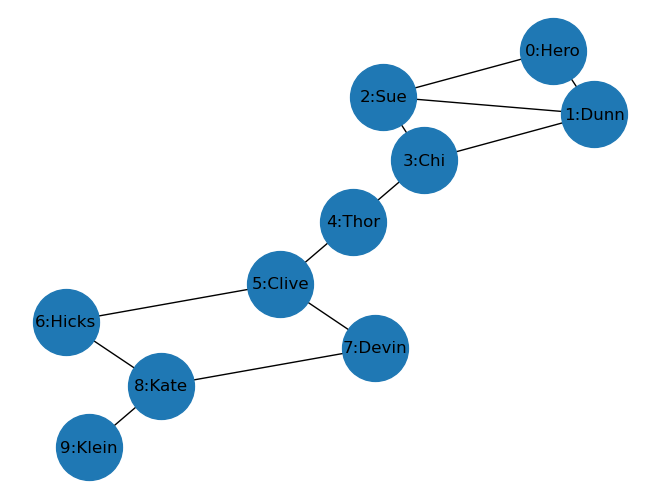

In [68]:
import networkx as nx
import matplotlib.pyplot as plt
 
# Build your graph
G = nx.from_edgelist(friendship_pairs)
G = nx.relabel_nodes(G, {user["id"]: f'{user["id"]}:{user["name"]}' for user in users})
 
# Plot it
nx.draw_kamada_kawai(G, node_size=2250, with_labels=True)
# plt.show()

In [69]:
def number_of_friends(user):
    """How many friends a user has"""
    user_id = user["id"]
    friend_ids = friendships[user_id]
    return len(friend_ids)

total_connections = sum(number_of_friends(user)
                       for user in users)

print(f'Total connections: {total_connections}')

Total connections: 24


In [70]:
num_users = len(users)
avg_connections = total_connections / num_users

print(f'Average connections per user: {avg_connections:.2f}')

Average connections per user: 2.40


In [71]:
# Most friends to least friends

num_friends_by_id = [(user["id"], number_of_friends(user))
                     for user in users]

num_friends_by_id.sort(
    key=lambda id_and_friends: id_and_friends[1],
    reverse=True
)

for user in num_friends_by_id:
    print(f'{users[user[0]]["name"]} has {user[1]} friends')

Dunn has 3 friends
Sue has 3 friends
Chi has 3 friends
Clive has 3 friends
Kate has 3 friends
Hero has 2 friends
Thor has 2 friends
Hicks has 2 friends
Devin has 2 friends
Klein has 1 friends


In [72]:
from collections import Counter

def friends_of_friends(user):
    return Counter(
        foaf_id
        for friend_id in friendships[user["id"]]        # foreach of my friends
        for foaf_id in friendships[friend_id]        # get their friends 
        if foaf_id != user["id"]                        # only if that friend is not me
        and foaf_id not in friendships[user["id"]]      # and i'm not already friends with them
    )

print(friends_of_friends(users[3]))

Counter({0: 2, 5: 1})


`users[3]` = Chi

`users[0]` = Hero

`users[5]` = Clive

Chi is not friends with Hero or Clive, but the below counter shows that Chi has 2 friends in common with Hero, and 1 friend in common with Clive:
> Counter({0: 2, 5: 1})